# Evaluation the Training: version_simple_v1


***

## Setup

    Training over $m =1000$ episodes.

In [103]:
import deepQLearningSimple as dql
import gym
from keras.models import load_model 
from gym.envs.classic_control.mountain_car import MountainCarEnv
from gym.wrappers.time_limit import TimeLimit

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json

savePlot = True

%matplotlib inline
sns.set_style("darkgrid")

def loadHistory(path):
    f = open(path + "history.json")
    return json.loads(f.read())

# Load version simple
path = "data/history/version_simple_v1/"
history = loadHistory(path)

print("History records: %s" %[i for i in history.keys()])

# num of episodes
episodes = max(history["episode"])

History records: ['reward', 'steps', 'mean_q_values', 'cum_win', 'position', 'episode']


## Wins

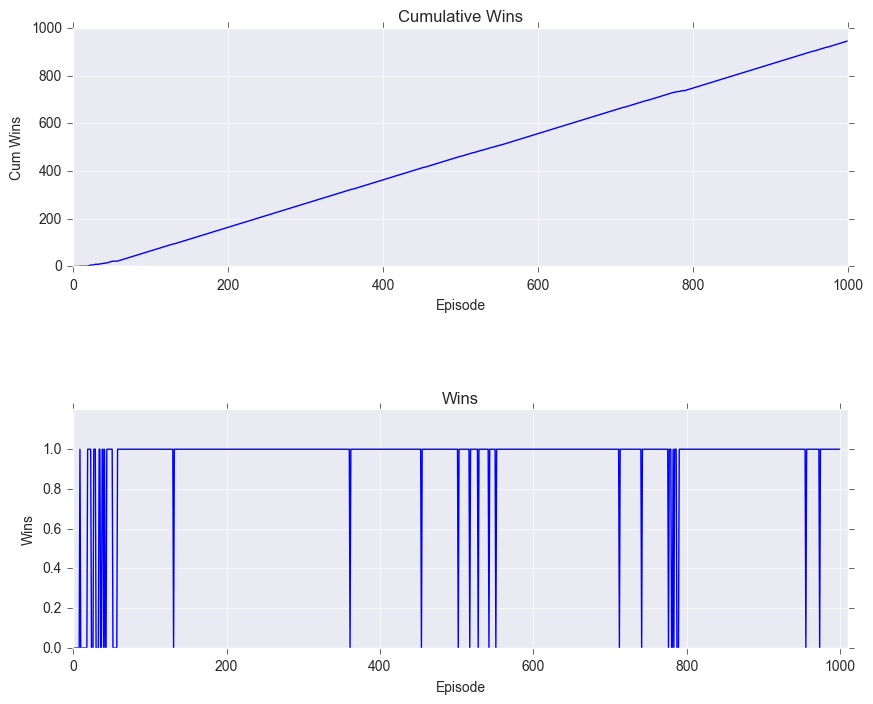

In [104]:
plt.figure(1, figsize= [10,8])


plt.subplot(211)
wins = history["cum_win"]
plt.plot(wins)
plt.xlabel('Episode')
plt.ylabel('Cum Wins')
plt.title('Cumulative Wins')
plt.ylim(0, episodes)
plt.xlim(0, episodes)

plt.subplot(212)
wins = list(map(lambda x: 1 if x >=0.5 else 0, history['position']["max_position"]))
plt.plot(wins, "-", marker= "")
plt.xlabel('Episode')
plt.ylabel('Wins')
plt.title('Wins')
plt.ylim(0, 1.2)
plt.xlim(0, episodes+10)
plt.subplots_adjust(hspace = 0.6)


plt.savefig('pic/simple_version_cum_win.png') if savePlot else None


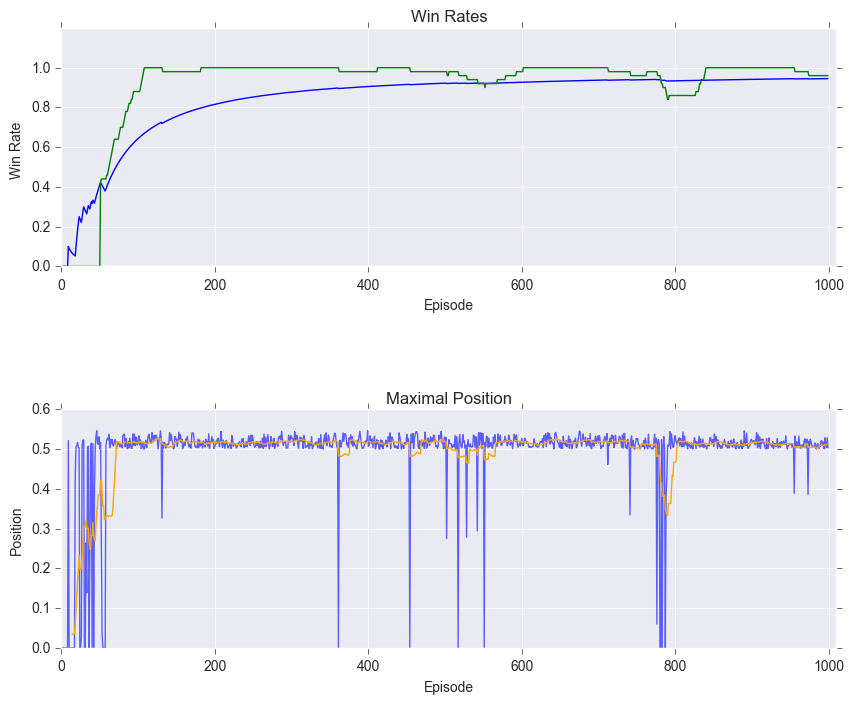

In [105]:
# Wins
def movingRate(lag):
    idx = range(len(history["cum_win"]) -1 )
    lag
    out = [ ((history["cum_win"][i + lag])- history["cum_win"][i]) / lag for i in idx if i < (episodes -1 - lag)]
    return list(np.append(np.zeros(lag +1), out))
    

cum_win_rate_moving = movingRate(50)
cum_win_rate = list(map(lambda a,b: (round(a / b, 4)), history["cum_win"], history["episode"]))

plt.figure(1, figsize= [10,8])
plt.subplot(211)
plt.plot(cum_win_rate, label = "Avg Wins")
plt.plot(cum_win_rate_moving, label = "MA Wins")
plt.xlabel('Episode')
plt.ylabel('Win Rate ')
plt.title('Win Rates')
plt.ylim(0, 1.2)
plt.xlim(0, episodes+10)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.subplot(212)
max_posision = history["position"]["max_position"]
max_posision = pd.Series(max_posision)
ma = max_posision.rolling(15).mean()
plt.plot(max_posision, alpha = 0.6, label = "Max Position")
plt.plot(ma, "orange", label = "MA Max Position")
plt.xlabel('Episode')
plt.ylabel('Position')
plt.title("Maximal Position")
plt.xlim(0, episodes +10)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(hspace = 0.6)

plt.savefig('pic/winRatesAndMaxPosition.png') if savePlot else None

plt.show()

## Return and Action Value

Best Episode :: 975 with max mean Q value :: 0.9175859093666077 


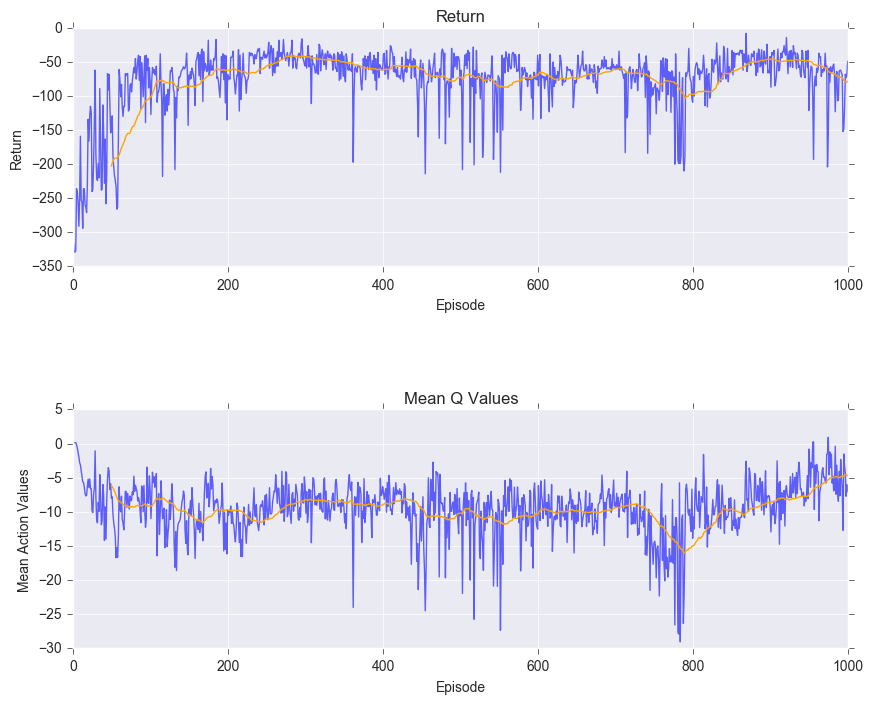

In [106]:
plt.figure(1, figsize= [10,8])


plt.subplot(211)
reward = history["reward"]
reward = pd.Series(reward)
ma = reward.rolling(50).mean()
plt.plot(reward, alpha = 0.6, label = "Return")
plt.plot(ma, "orange", label = "MA Return")
plt.xlabel('Episode')
plt.ylabel('Return')
plt.title("Return")
plt.xlim(0,episodes)
#plt.legend(bbox_to_anchor=(1, 0.2), borderaxespad=0.)

plt.subplot(212)
mean_action_values = history["mean_q_values"]
mean_action_values = pd.Series(mean_action_values)
ma = mean_action_values.rolling(50).mean()
plt.plot(mean_action_values, alpha = 0.6, label = "Mean Q-Values")
plt.plot(ma, "orange", label = "MA Mean Q-Values")
plt.xlabel('Episode')
plt.ylabel('Mean Action Values')
plt.title("Mean Q Values")
plt.xlim(0, episodes)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(hspace = 0.6)


plt.savefig('pic/returnAndQvalues.png') if savePlot else None

best_episode = np.argmax(history["mean_q_values"])
print("Best Episode :: {} with max mean Q value :: {} ".format(history["episode"][best_episode], history["mean_q_values"][best_episode]) )

## Position

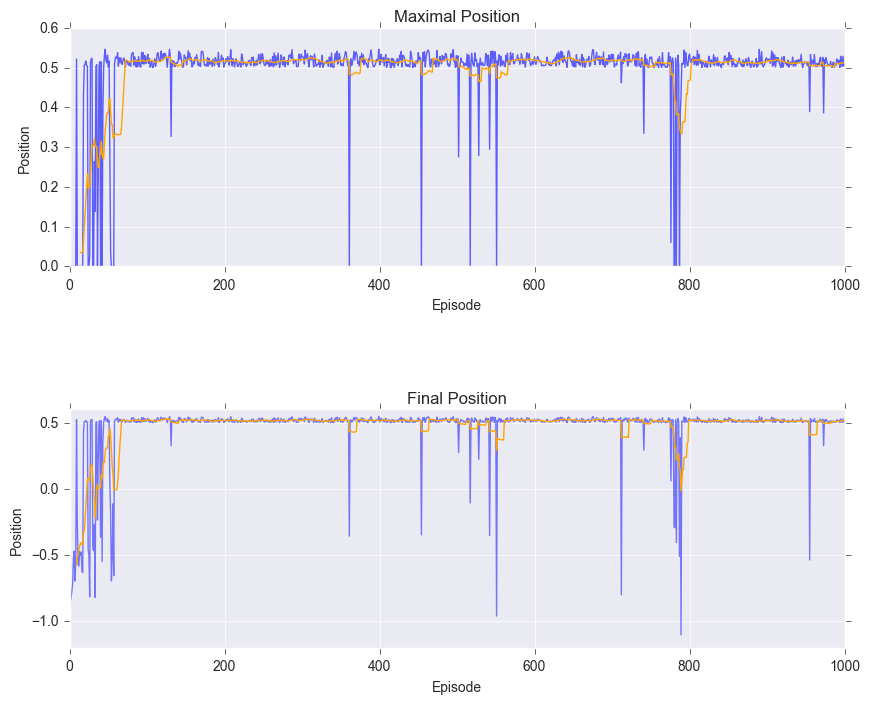

In [107]:
plt.figure(1, figsize= [10,8])


plt.subplot(211)
max_posision = history["position"]["max_position"]
max_posision = pd.Series(max_posision)
ma = max_posision.rolling(15).mean()
plt.plot(max_posision, alpha = 0.6)
plt.plot(ma, "orange")
plt.xlabel('Episode')
plt.ylabel('Position')
plt.title("Maximal Position")
plt.xlim(0,episodes)

plt.subplot(212)
final_position = history["position"]["final_position"]
final_position = pd.Series(final_position)
ma = final_position.rolling(10).mean()
plt.plot(final_position, alpha = 0.5)
plt.plot(ma, "orange")
plt.xlabel('Episode')
plt.ylabel('Position')
plt.title("Final Position")
plt.xlim(0,episodes)
plt.subplots_adjust(hspace = 0.6)

plt.show()

# Steps per won game

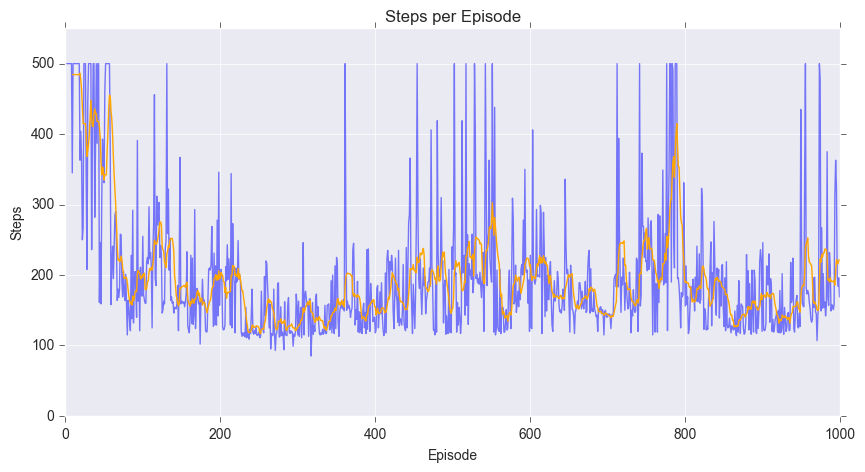

In [108]:
plt.figure(1, figsize= [10,5])
steps = history["steps"]
#steps = [step for step in steps if step < 500]
steps = pd.Series(steps)
ma = steps.rolling(10).mean()
plt.plot(steps, alpha = 0.5)
plt.plot(ma, "orange")
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.ylim(0, 550)
plt.title('Steps per Episode')

plt.savefig('pic/stepPerEpisode.png') if savePlot else None